In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen
from mplsoccer import VerticalPitch,Pitch

In [5]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(18236)
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'sub_type_id', 'sub_type_name',
       'body_part_id', 'body_part_name', 'x', 'y', 'pass_backheel',
       'outcome_id', 'outcome_name', 'under_pressure', 'counterpress',
       'dribble_overrun', 'pass_cross', 'pass_switch', 'aerial_won',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_statsbomb_xg',
       'shot_key_pass_id', 'technique_id', 'technique_name',
       'goalkeeper_position_id', 'goalkeeper_position_name', 'off_camera',
       'shot_first_time', 'ball_recovery_offensive', 'end_z',


In [6]:
df_merged = pd.merge(df, tactics[['jersey_number', 'player_id']], on='player_id', how='left')

In [7]:
df = df[df.type_name == 'Pass']
df = df[['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name","team_name","minute",'player_id']]
tactics = tactics[['jersey_number','player_id']]

# Merge tactics and df on player_id
df_merged = pd.merge(df, tactics[['jersey_number', 'player_id']], on='player_id', how='left')

In [8]:
# Define the name replacement dictionary
name_replacements = {
    'Lionel Andrés Messi Cuccittini': 'Gabigol',
    'David Villa Sánchez': 'David Villa',
    'Pedro Eliezer Rodríguez Ledesma': 'Pedro Rodriguez',
    'Sergio Busquets i Burgos': 'Sergio Busquets',
    'Andrés Iniesta Luján': 'Andres Iniesta',
    'Xavier Hernández Creus': 'Xavi',
    'Eric-Sylvain Bilal Abidal' : 'Eric Abidal',
    'Daniel Alves da Silva': 'Dani Alves',
    'Carles Puyol i Saforcada': 'Carles Puyol',
    'Gerard Piqué Bernabéu': 'Gerard Pique',
    'Javier Alejandro Mascherano': 'Javier Mascherano',
    'Víctor Valdés Arribas': 'Victor Valdes',
    
    'Edwin van der Sar': 'Van der Sar',
    'Patrice Latyr Evra': 'Patrice Evra',
    'Nemanja Vidić': 'Nemanja Vidic',
    'Rio Gavin Ferdinand': 'Rio Ferdinand',
    'John Michael O Shea': 'John O Shea',
    'Ryan Joseph Giggs': 'Ryan Giggs',
    'Michael Carrick': 'Carrick',
    'Luis Antonio Valencia Mosquera': 'Valencia',
    'Wayne Mark Rooney': 'Wayne Rooney',
    'Javier Hernández Balcázar': 'Javier Hernandez',
    'Anderson Luís de Abreu Oliveira': 'Anderson',
    'Luís Carlos Almeida da Cunha' : 'Nani',
    'Fábio Pereira da Silva' : 'Fabio'
}

# Replace the names in the dataframe columns using the dictionary
df_merged['player_name'] = df_merged['player_name'].replace(name_replacements)
df_merged['pass_recipient_name'] = df_merged['pass_recipient_name'].replace(name_replacements)
df_merged.sort_values(by='team_name', inplace=True)

In [9]:
hteam = df_merged['team_name'].iloc[0]
ateam = df_merged['team_name'].iloc[-1]
print('Home Team : ' + hteam)
print('Away Team : ' + ateam)

Home Team : Barcelona
Away Team : Manchester United


In [10]:
df_home_pass = df_merged[df_merged.team_name == hteam]

# Check player play time
home_player_df = df_merged[df_merged.team_name == hteam].groupby('player_name').agg({'minute': [min, max]}).reset_index()
home_player_df = pd.concat([home_player_df['player_name'], home_player_df['minute']], axis=1)
home_player_df['minutes_played'] = home_player_df['max'] - home_player_df['min']
home_player_df = home_player_df.sort_values('minutes_played', ascending=False)

C:\Users\Letic\AppData\Local\Temp\ipykernel_5716\2119043267.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  home_player_df = df_merged[df_merged.team_name == hteam].groupby('player_name').agg({'minute': [min, max]}).reset_index()
C:\Users\Letic\AppData\Local\Temp\ipykernel_5716\2119043267.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  home_player_df = df_merged[df_merged.team_name == hteam].groupby('player_name').agg({'minute': [min, max]}).reset_index()


In [11]:
home_player_name = home_player_df.player_name[:11].tolist()
df_home_pass = df_home_pass[df_home_pass.player_name.isin(home_player_name)]
df_home_pass = df_home_pass[df_home_pass.pass_recipient_name.isin(home_player_name)]

In [12]:
scatter_df = pd.DataFrame()
for i, name in enumerate(df_home_pass["player_name"].unique()):
    passx = df_home_pass.loc[df_home_pass["player_name"] == name]["x"].to_numpy()
    recx = df_home_pass.loc[df_home_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = df_home_pass.loc[df_home_pass["player_name"] == name]["y"].to_numpy()
    recy = df_home_pass.loc[df_home_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name

    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))

    #calculate number of passes
    scatter_df.at[i, "no"] = df_home_pass.loc[df_home_pass["player_name"] == name].count().iloc[0]
    scatter_df.at[i, "jersey_number"] = df_home_pass.loc[df_home_pass["player_name"] == name]['jersey_number'].iloc[0]
    scatter_df['jersey_number'] = scatter_df['jersey_number'].astype(int)
    
#adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

In [13]:
#Calculate edge width
df_home_pass["pair_key"] = df_home_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = df_home_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold
lines_df = lines_df[lines_df['pass_count']>5]

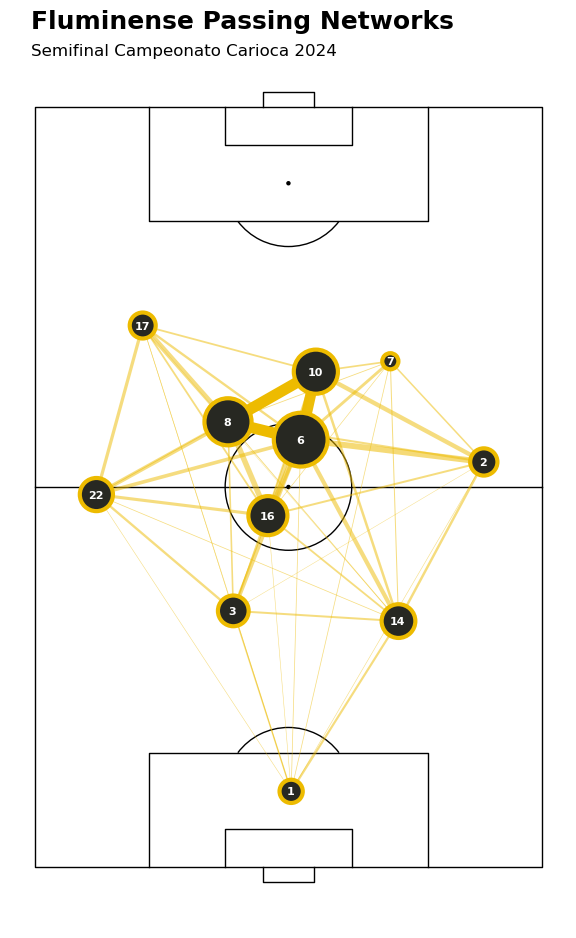

In [14]:
pitch = VerticalPitch(pitch_type='statsbomb', line_color='black',linewidth=1,goal_type='box')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plot vertices
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='#272822', edgecolors='#EDBB00', linewidth=3, alpha=1, ax=ax["pitch"], zorder = 3)

'''#Add Players Name and Jersey Numbers
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x +6, row.y), c='white', va='center',
                   ha='center', size=6, weight = "bold", ax=ax["pitch"], zorder = 4, 
                   bbox=dict(facecolor='#272822', alpha=1, edgecolor='#272822', boxstyle='round,pad=0.4'))'''
    
for i, row in scatter_df.iterrows():
    pitch.annotate(row.jersey_number, xy=(row.x, row.y-0.1), c='white', va='center',
                   ha='center', size=8, weight = "bold", ax=ax["pitch"], zorder = 4)

#Plot edges
for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 8)
        # adjust the alpha of the lines based on number of passes and set minimum alpha for a fewer pass
        alpha = max(num_passes / lines_df['pass_count'].max(), 0.2)
        alpha = max(alpha, 0.5)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=alpha, lw=line_width, zorder=2, color="#EDBB00", ax = ax["pitch"])

fig.text(s="Fluminense" + " "+ "Passing Networks", x= 0.06, y= 1, fontsize=18,fontweight="bold") #hteam 
fig.text(s='Semifinal Campeonato Carioca 2024', x = 0.06, y=0.97, fontsize=12)
plt.show()